<a href="https://colab.research.google.com/github/Agum82/UAS-KecerdasanBuatan/blob/main/covid_19Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [6]:
data.head(20)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [7]:
data.tail(20)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
167,Thailand,3297,58,3111,128,6,0,2,1.76,94.36,1.86,3250,47,1.45,South-East Asia
168,Timor-Leste,24,0,0,24,0,0,0,0.00,0.00,0.00,24,0,0.00,South-East Asia
169,Togo,874,18,607,249,6,0,8,2.06,69.45,2.97,783,91,11.62,Africa
170,Trinidad and Tobago,148,8,128,12,1,0,0,5.41,86.49,6.25,137,11,8.03,Americas
171,Tunisia,1455,50,1157,248,3,0,15,3.44,79.52,4.32,1381,74,5.36,Eastern Mediterranean
172,Turkey,227019,5630,210469,10920,919,17,982,2.48,92.71,2.67,220572,6447,2.92,Europe
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
174,Uganda,1128,2,986,140,13,0,4,0.18,87.41,0.20,1069,59,5.52,Africa
175,Ukraine,67096,1636,37202,28258,835,11,317,2.44,55.45,4.40,60767,6329,10.42,Europe
176,United Arab Emirates,59177,345,52510,6322,264,1,328,0.58,88.73,0.66,57193,1984,3.47,Eastern Mediterranean


In [8]:
data.dtypes

,0
Country/Region,object
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
New cases,int64
New deaths,int64
New recovered,int64
Deaths / 100 Cases,float64
Recovered / 100 Cases,float64


In [9]:
data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [10]:
data.isnull().sum()

,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
who_region_counts = data['WHO Region'].value_counts()
who_region_counts

,count
WHO Region,
Europe,56
Africa,48
Americas,35
Eastern Mediterranean,22
Western Pacific,16
South-East Asia,10


In [17]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoder = LabelEncoder()
data['WHO Region'] = label_encoder.fit_transform(data['WHO Region'])

In [39]:
print(data.columns.tolist())

['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region']


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

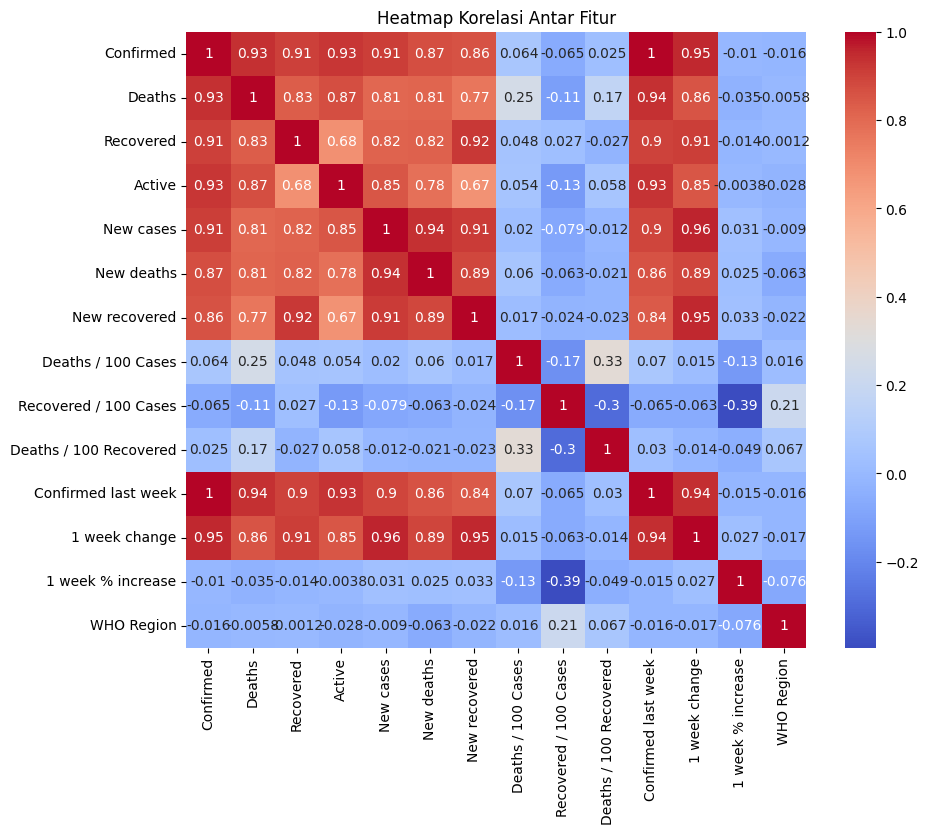

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation
numerical_cols = data.select_dtypes(include=np.number).columns
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

/tmp/ipython-input-46-3792147758.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WHO Region', data=data, palette='Set2')


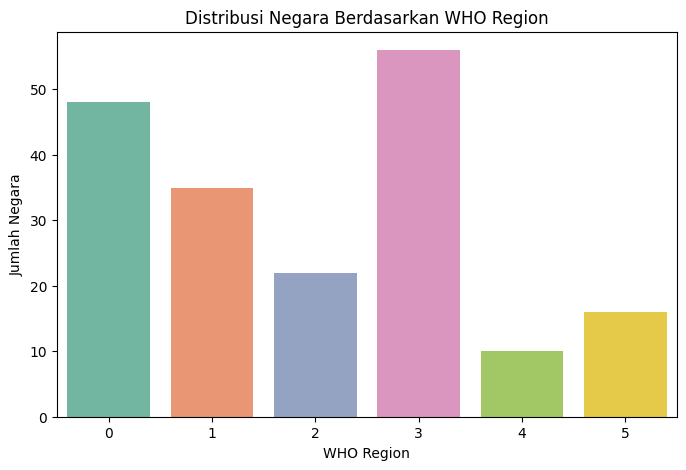

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='WHO Region', data=data, palette='Set2')
plt.title('Distribusi Negara Berdasarkan WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Jumlah Negara')
plt.show()

/tmp/ipython-input-47-2020398544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WHO Region', y='Confirmed', data=data, palette='Set2')


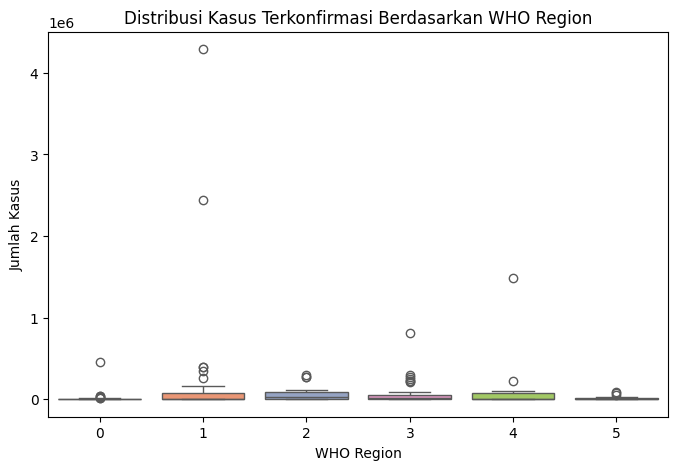

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='WHO Region', y='Confirmed', data=data, palette='Set2')
plt.title('Distribusi Kasus Terkonfirmasi Berdasarkan WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Jumlah Kasus')
plt.show()

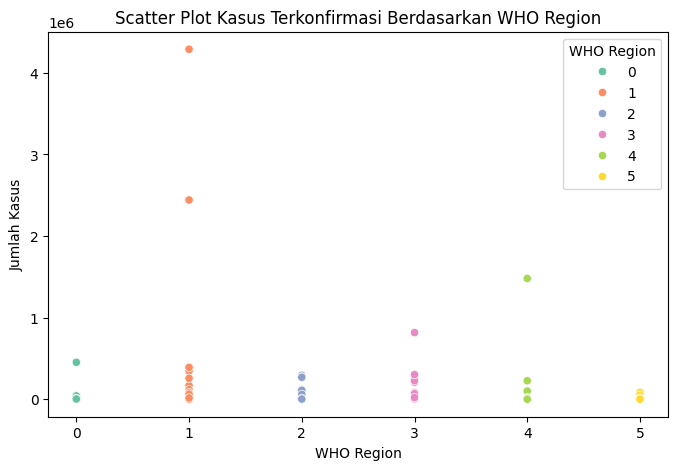

In [48]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='WHO Region', y='Confirmed', data=data, hue='WHO Region', palette='Set2')
plt.title('Scatter Plot Kasus Terkonfirmasi Berdasarkan WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Jumlah Kasus')
plt.show()


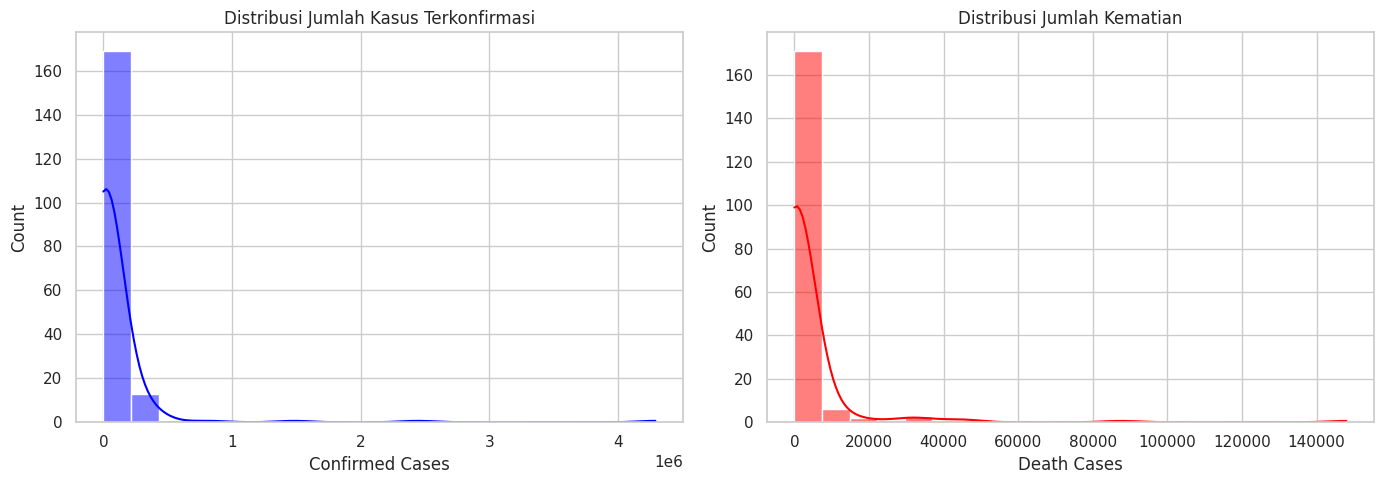

In [ ]:
# Atur style
sns.set(style='whitegrid')

# 1. HISTOGRAM – Distribusi Kasus dan Kematian
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data ['Confirmed'], bins=20, color='blue', kde=True)
plt.title('Distribusi Jumlah Kasus Terkonfirmasi')
plt.xlabel('Confirmed Cases')

plt.subplot(1, 2, 2)
sns.histplot(data ['Deaths'], bins=20, color='red', kde=True)
plt.title('Distribusi Jumlah Kematian')
plt.xlabel('Death Cases')

plt.tight_layout()
plt.show()

<ipython-input-12-aecdda4ba311>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country/Region', x='Confirmed', data=top10_cases, palette='Blues_r')


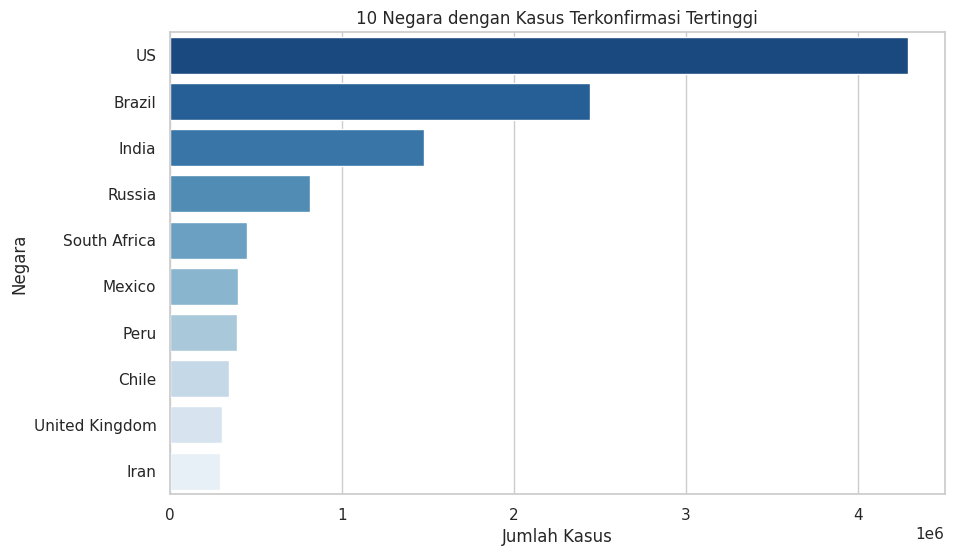

In [ ]:
# BAR CHART – 10 Negara dengan Kasus Tertinggi
top10_cases = data.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y='Country/Region', x='Confirmed', data=top10_cases, palette='Blues_r')
plt.title('10 Negara dengan Kasus Terkonfirmasi Tertinggi')
plt.xlabel('Jumlah Kasus')
plt.ylabel('Negara')
plt.show()

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DATASET/country_wise_latest.csv')

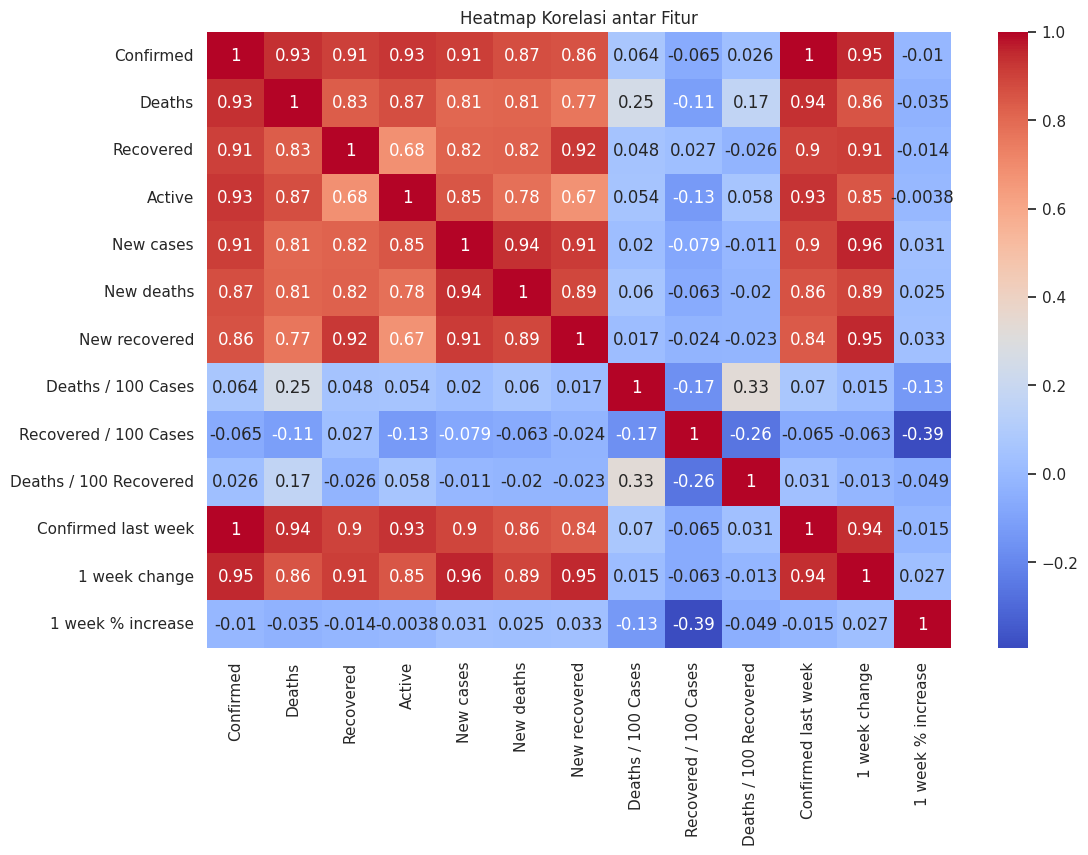

In [ ]:
# Heatmap
plt.figure(figsize=(12, 8))
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi antar Fitur")
plt.show()

In [ ]:
# CREATE TARGET LABEL
data['Impact'] = data['Deaths'].apply(lambda x: 'High' if x > 10000 else 'Low')

<ipython-input-14-6cba26820c7e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Impact', data=data, palette='Set2')


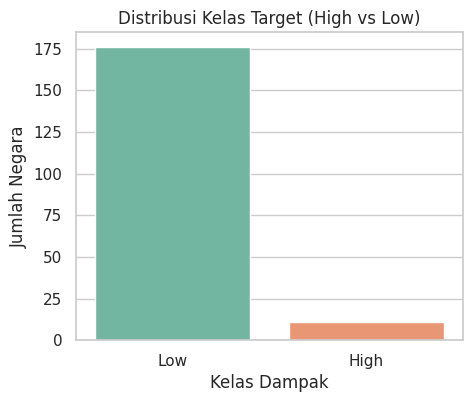

In [ ]:
# Bar chart distribusi kelas
plt.figure(figsize=(5, 4))
sns.countplot(x='Impact', data=data, palette='Set2')
plt.title('Distribusi Kelas Target (High vs Low)')
plt.xlabel('Kelas Dampak')
plt.ylabel('Jumlah Negara')
plt.show()

In [ ]:
# Persentase kelas
impact_counts = data['Impact'].value_counts(normalize=True) * 100
print("Persentase kelas:")
print(impact_counts)

Persentase kelas:
Impact
Low     94.117647
High     5.882353
Name: proportion, dtype: float64


In [ ]:
# INSIGHT AWAL
# Negara dengan kematian tertinggi
top_deaths = data.sort_values(by='Deaths', ascending=False)[['Country/Region', 'Deaths']].head(5)
print("\nNegara dengan jumlah kematian tertinggi:")
print(top_deaths)

# Negara dengan rasio kesembuhan tinggi
high_recovery = data.sort_values(by='Recovered / 100 Cases', ascending=False)[['Country/Region', 'Recovered / 100 Cases']].head(5)
print("\nNegara dengan rasio kesembuhan tertinggi:")
print(high_recovery)


Negara dengan jumlah kematian tertinggi:
     Country/Region  Deaths
173              US  148011
23           Brazil   87618
177  United Kingdom   45844
111          Mexico   44022
85            Italy   35112

Negara dengan rasio kesembuhan tertinggi:
   Country/Region  Recovered / 100 Cases
75       Holy See                 100.00
69        Grenada                 100.00
49       Dominica                 100.00
48       Djibouti                  98.38
78        Iceland                  98.33


In [ ]:
# PREPROCESSING
# Drop unnecessary columns and handle infinities/NaNs
df = data.drop(columns=['Country/Region', 'Impact']).replace([np.inf, -np.inf], np.nan).fillna(0)

# Scale the numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['WHO Region'])) # Exclude 'WHO Region' from scaling

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Impact'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# MODEL
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1519 - loss: 0.7398 - val_accuracy: 0.9333 - val_loss: 0.6662
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8764 - loss: 0.6458 - val_accuracy: 0.9667 - val_loss: 0.5817
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9584 - loss: 0.5694 - val_accuracy: 0.9667 - val_loss: 0.5157
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9596 - loss: 0.5009 - val_accuracy: 0.9667 - val_loss: 0.4583
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9264 - loss: 0.4546 - val_accuracy: 0.9667 - val_loss: 0.4038
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9513 - loss: 0.3958 - val_accuracy: 0.9667 - val_loss: 0.3509
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9753 - loss: 0.3189 - val_accuracy: 0.9667 - val_loss: 0.3000
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9276 - loss: 0.3169 - val_accuracy: 0.9667 - val_loss: 0.2593
Ep

In [ ]:
# EVALUASI
loss, acc = model.evaluate(X_test, y_test)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype('int32')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9161 - loss: 0.1743
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[ 1  2]
 [ 1 34]]
              precision    recall  f1-score   support

        High       0.50      0.33      0.40         3
         Low       0.94      0.97      0.96        35

    accuracy                           0.92        38
   macro avg       0.72      0.65      0.68        38
weighted avg       0.91      0.92      0.91        38



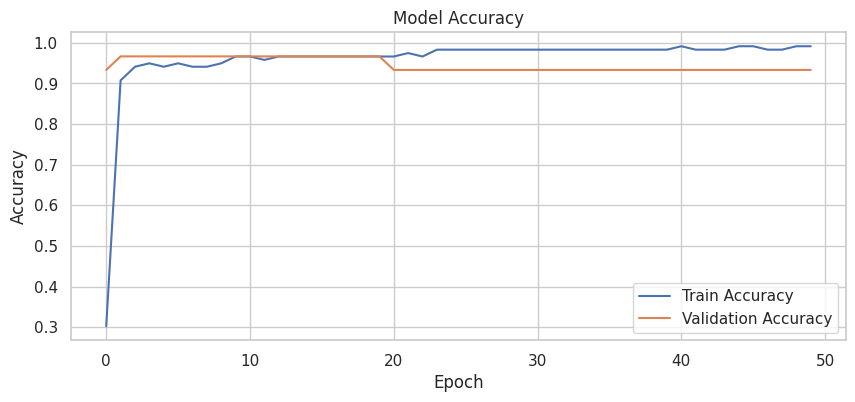

In [ ]:
# STEP 9: VISUALISASI AKURASI
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

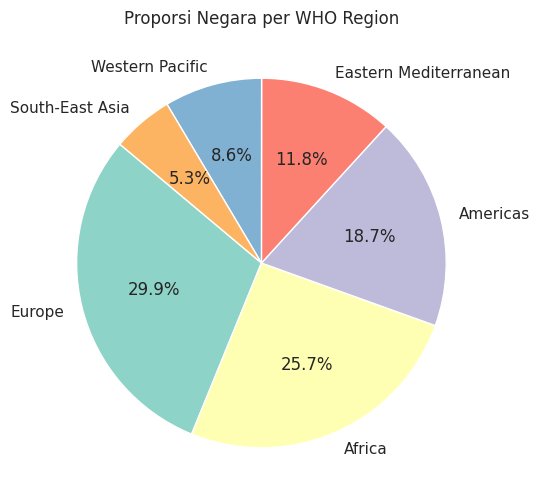

In [ ]:
# 3. PIE CHART – Proporsi WHO Region
plt.figure(figsize=(6, 6))
df['WHO Region'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Proporsi Negara per WHO Region')
plt.ylabel('')
plt.show()

To ensure the `data` variable contains the original DataFrame, I will first reload the data from the CSV file and then calculate the value counts for the 'WHO Region' column.